<img src="https://uwe-cyber.github.io/images/uwe_banner.png">

# UFCFEL-15-3 Security Data Analytics and Visualisation
## Portfolio Assignment: Part 1
### Academic year: 2024-25

## Conduct a security investigation on web traffic from an organisation
---

For this task, the company UWEtech have enlisted your support as a security data analyst. They believe that they have suffered an attack on their network, however they are unable to diagnose what has happened exactly. The company have provided you with an extract of their network traffic, for which you will use visualisation techniques to learn more about the underlying activity on their systems.

**Dataset:** You will be issued a dataset for this task via GitLab: https://gitlab.uwe.ac.uk/a23-mccarthy/sdav-2024

**This exercise carries a weight of 25% towards your overall portfolio submission**

It is strongly encouraged that you use the online reference guides for [Matplotlib](https://matplotlib.org/) and [pandas](https://pandas.pydata.org/) - searching the API documentation will answer many of your questions.


### Submission Documents
---

For Part 1 of your portfolio, your complete output file should be saved as:

- **STUDENT_ID-PART1.ipynb**

This should then be included in a ZIP file along with your other two portfolio documents.

The deadline for all portfolio submissions is **THURSDAY 12th DECEMBER @ 14:00**. 

In [2]:
### Load in the libraries and the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

def load_csv_data():
    data = pd.read_csv('/Users/yaminshweyihtay/SDAV/Security-Data-Analysis-and-Visualisation/Part1/packet-capture3.csv')
    return data

data = load_csv_data()
data = data[ data['Source'].isin(data['Source'].value_counts().head(30).index) ] 
data = data.drop('No.', axis=1)
data

,Time,Source,Destination,Protocol,Length,Info
0,0.000000,10.20.0.165,209.85.143.19,TCP,62,1698 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=1...
1,0.017691,209.85.143.19,10.20.0.165,TCP,62,"443 > 1698 [SYN, ACK] Seq=0 Ack=1 Win=5720 L..."
2,0.017729,10.20.0.165,209.85.143.19,TCP,54,1698 > 443 [ACK] Seq=1 Ack=1 Win=65535 Len=0
3,0.018382,10.20.0.165,209.85.143.19,SSLv3,156,Client Hello
4,0.032859,209.85.143.19,10.20.0.165,TCP,60,443 > 1698 [ACK] Seq=1 Ack=103 Win=5720 Len=0
...,...,...,...,...,...,...
9380,833.452154,10.20.0.165,10.20.0.130,SMB,180,"Tree Connect AndX Request, Path: \\\\WIN-JIDID..."
9382,833.458302,10.20.0.165,10.20.0.130,SMB,130,"Trans2 Request, GET_DFS_REFERRAL, File:"
9384,833.557382,10.20.0.165,10.20.0.130,SMB,156,"Trans2 Request, GET_DFS_REFERRAL, File: \\bhra..."
9386,833.558091,10.20.0.165,10.20.0.130,SMB,148,"Trans2 Request, GET_DFS_REFERRAL, File: \\BHRA..."


---


### Question 1: Plot a Line Chart that clearly depicts "Seconds" on the x-axis, and "Total Number of Packets" sent on the y-axis, complete with axis labeling. 

#### (4 marks)

*Hint: The time is given in seconds with millisecond precision - think how you could aggregate this value to represent seconds only, then research a function that counts the value totals in your data.*

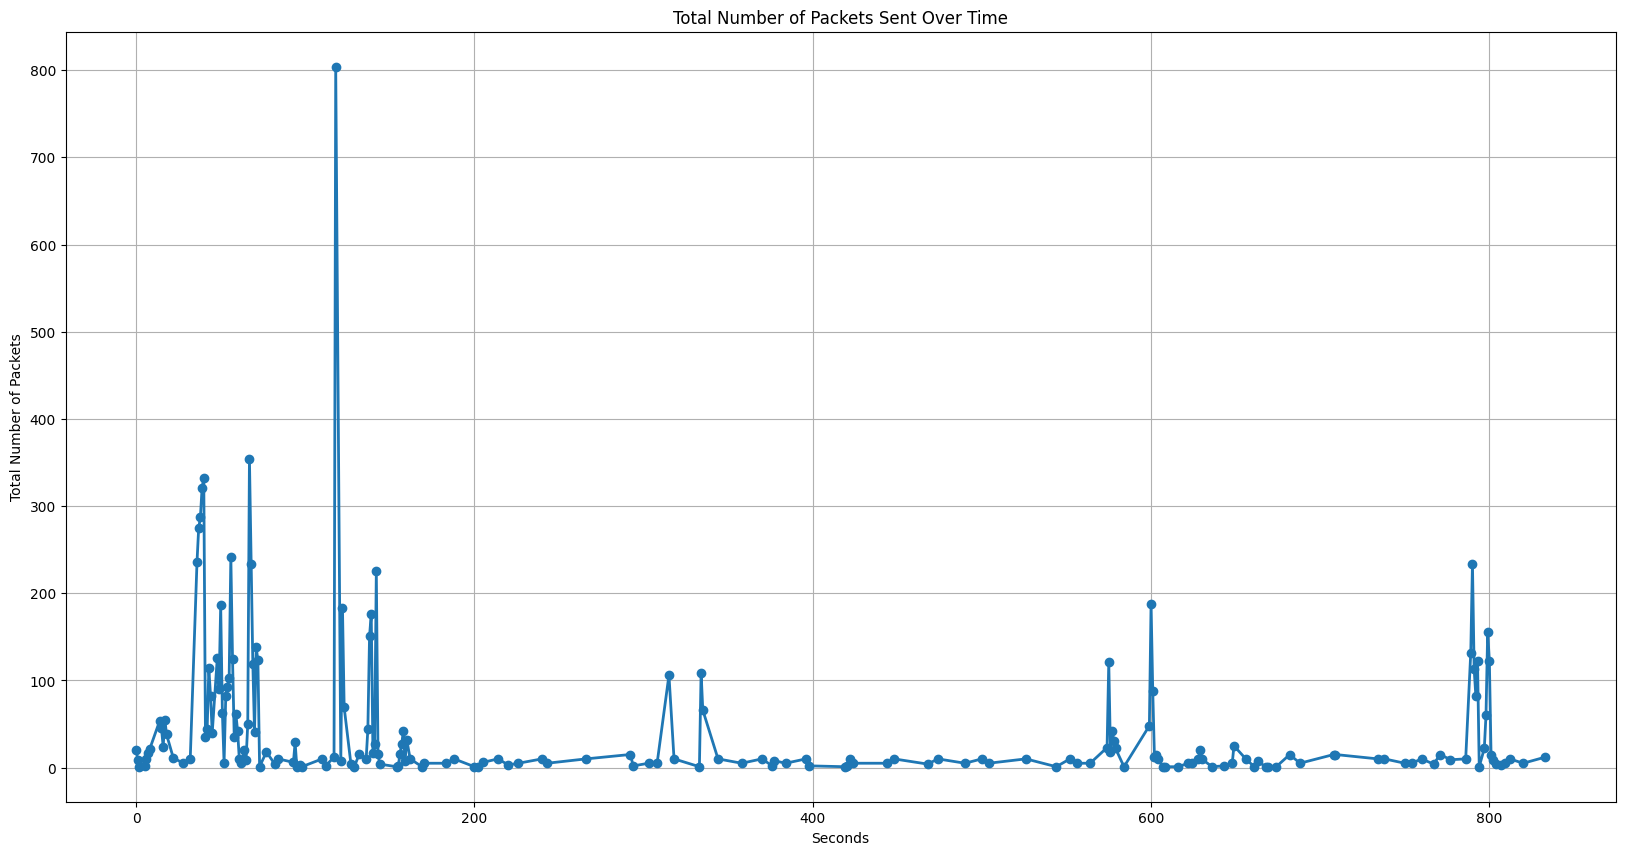

In [3]:
# Extract seconds from the time column 
#convert it to Whole Seconds 
data['Seconds'] = np.floor(data['Time']).astype(int) 

  

# Aggregate data by seconds 

packets_per_second = data.groupby('Seconds')['Time'].count().reset_index() 

packets_per_second.columns = ['Seconds', 'Total Packets'] 

  

# Plot the line chart 

plt.figure(figsize=(20, 10)) 

plt.plot(packets_per_second['Seconds'], packets_per_second['Total Packets'], marker='o', linestyle='-', linewidth=2) 

plt.xlabel('Seconds') 

plt.ylabel('Total Number of Packets') 

plt.title('Total Number of Packets Sent Over Time') 

plt.grid(True) 

plt.show() 

### Question 2: Display a Bar Chart that shows "Protocol" on the x-axis, and "Count" on the y-axis, complete with axis labeling. 
#### (2 marks)

*Hint: Search the pandas documentation for creating a Bar Chart from a DataFrame column.*

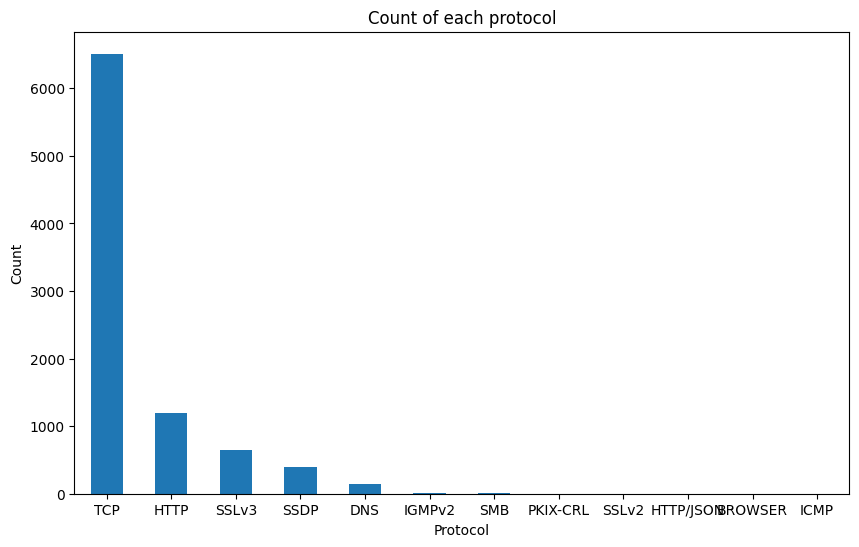

In [4]:
# Count the occurrrences of each protocol ( occurrence of each unique value in Protocol) using value_count()
protocol_counts =data["Protocol"].value_counts()     

#Create bar chart
protocol_counts.plot(kind='bar',figsize = (10,6)) 
plt.xlabel("Protocol")    # x axis -label 
plt.ylabel("Count")   # y axis - lable 
plt.title ("Count of each protocol")    # chart title 
plt.xticks(rotation=360) # rotate x-axis labels for better readability
plt.show()


### Question 3: Display a Scatter Chart that shows the association between Source and Destination data. 

#### (2 marks)
*Hint: Matplotlib has a scatterplot function that takes x and y as inputs*

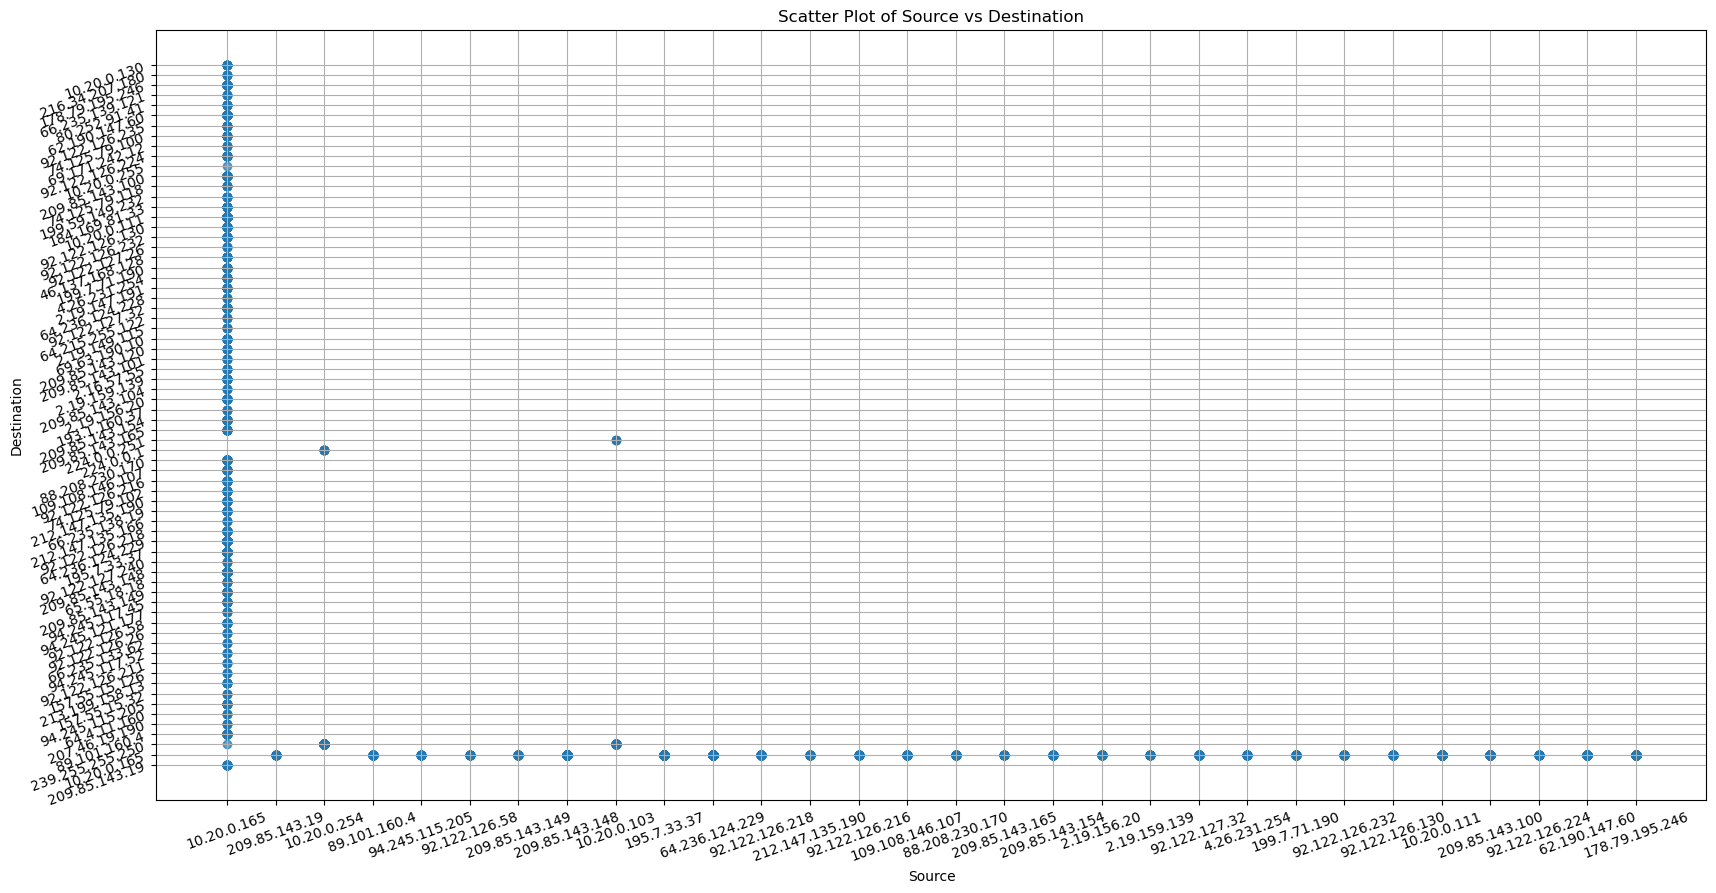

In [ ]:
# Extract the columns 'Source' and 'Destination' for plotting 
x = data['Source']
y = data ['Destination']



# Create the scatter plot 
plt.figure(figsize= (20,10))    # set figure size    
plt.scatter(x,y, alpha = 0.7)   # scatter plot with transparency for visibility 
plt.xlabel("Source")
plt.ylabel("Destination")
plt.title("Scatter Plot of Source vs Destination")
plt.xticks(rotation=20)
plt.yticks(rotation=20)

plt.grid(True)     #gridlines for better readability
plt.show()

### Question 4: Display the data as a node link diagram using Source and Destination as your edges. 

#### (3 marks)

*Hint: Look at the NetworkX library: https://networkx.org/ and the online course notes.*

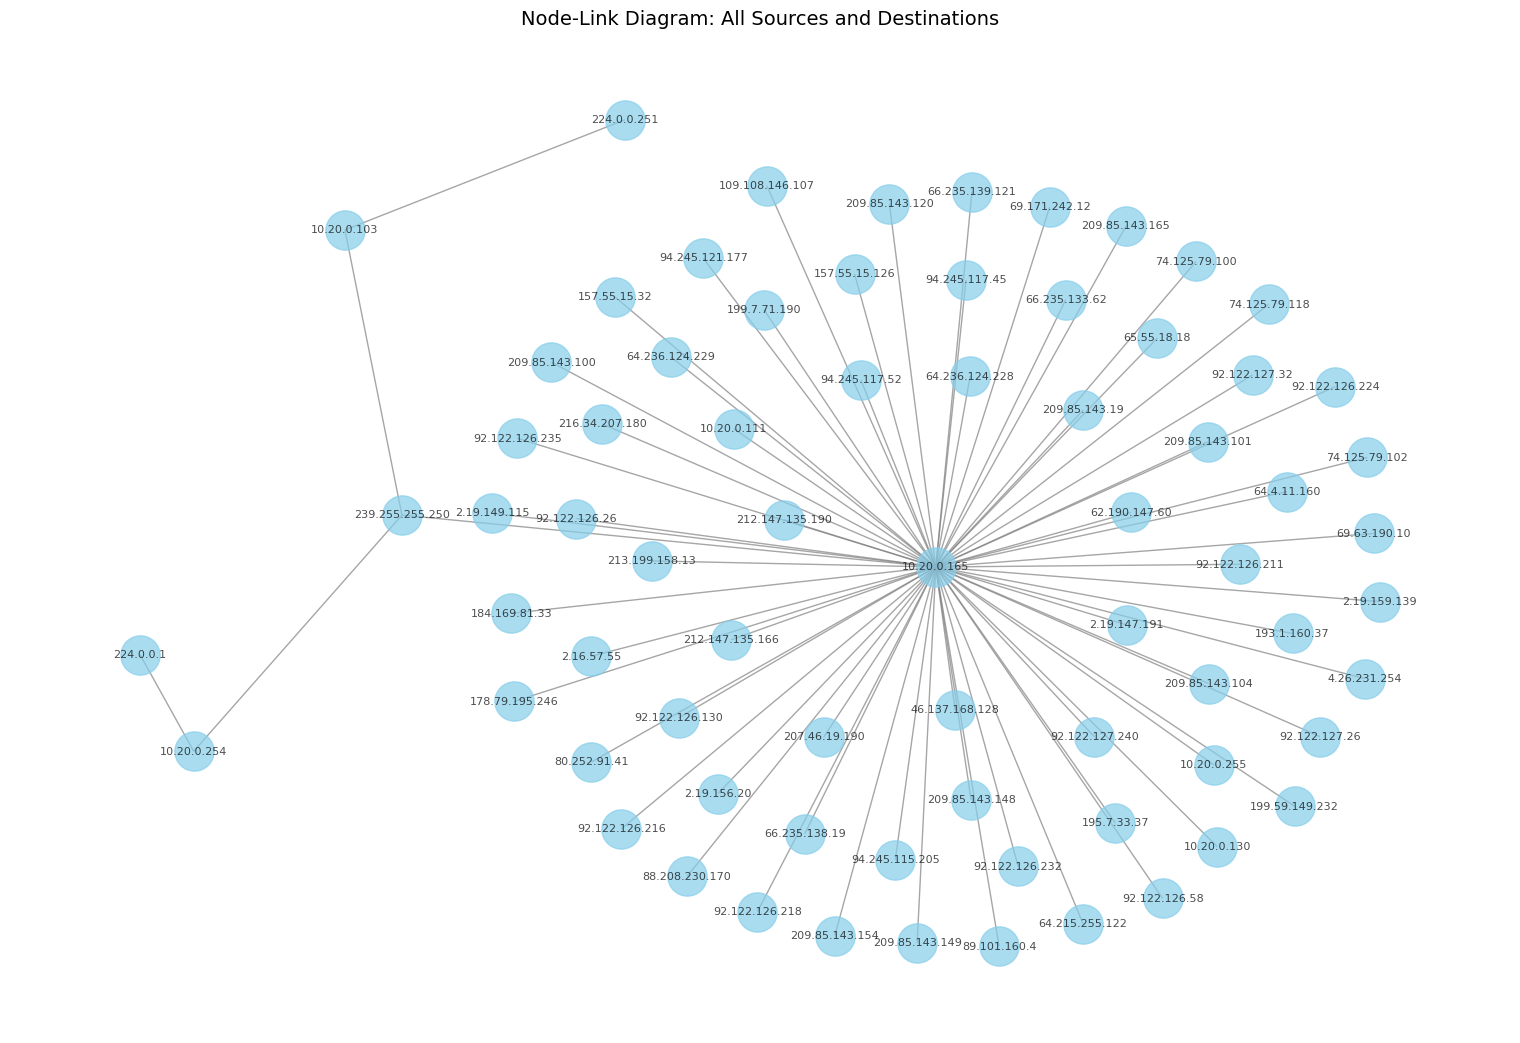

In [ ]:
# Build the graph 

G = nx.from_pandas_edgelist(data, 'Source', 'Destination') 

  

# Create a 2D layout for simplicity 

pos = nx.spring_layout(G, k=1, iterations=100)  # Increase 'k' for better spacing 

  

# Visualize the graph 

plt.figure(figsize=(15, 10))  # Larger figure size for better clarity 

nx.draw( 

    G, 

    pos, 

    with_labels=True,  # Keep labels to identify nodes 

    node_size=800,  # Similar node size to the filtered version 

    node_color="skyblue", 

    edge_color="gray", 

    font_size=8,  # Reduce font size slightly for larger datasets 

    alpha=0.7,  # Transparency for overlapping edges 

) 

plt.title('Node-Link Diagram: All Sources and Destinations', fontsize=14) 

plt.show() 

### Question 5: For each Protocol type, create a new Column and assign whether the Protocol usage is True or False 

#### (2 marks)
Hint: Get a list of unique protocol values, assign each value to be a new column where the Protocol column is equal to the Protocol name.

In [ ]:

from IPython.display import HTML
unique_protocols = data['Protocol'].unique()

for protocol in unique_protocols:
    data[protocol] = data['Protocol'] == protocol 


#Display the updated dataframe
HTML(data.head().to_html())


,Time,Source,Destination,Protocol,Length,Info,Seconds,TCP,SSLv3,SSDP,DNS,HTTP,HTTP/JSON,IGMPv2,SSLv2,PKIX-CRL,BROWSER,ICMP,SMB
0,0.000000,10.20.0.165,209.85.143.19,TCP,62,1698 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=1460 SACK_PERM,0,True,False,False,False,False,False,False,False,False,False,False,False
1,0.017691,209.85.143.19,10.20.0.165,TCP,62,"443 > 1698 [SYN, ACK] Seq=0 Ack=1 Win=5720 Len=0 MSS=1430 SACK_PERM",0,True,False,False,False,False,False,False,False,False,False,False,False
2,0.017729,10.20.0.165,209.85.143.19,TCP,54,1698 > 443 [ACK] Seq=1 Ack=1 Win=65535 Len=0,0,True,False,False,False,False,False,False,False,False,False,False,False
3,0.018382,10.20.0.165,209.85.143.19,SSLv3,156,Client Hello,0,False,True,False,False,False,False,False,False,False,False,False,False
4,0.032859,209.85.143.19,10.20.0.165,TCP,60,443 > 1698 [ACK] Seq=1 Ack=103 Win=5720 Len=0,0,True,False,False,False,False,False,False,False,False,False,False,False


### Question 6: Show a Multi-Line Chart that shows the Total Number of Packets Per Protocol on the y-axis and "Seconds" on the x-axis. You should display a legend that states the colour of each protocol.

#### (6 marks)
*Hint: Think about how you did this in Question 1 , and recall that plt.plot can be used to append to an existing plot.*

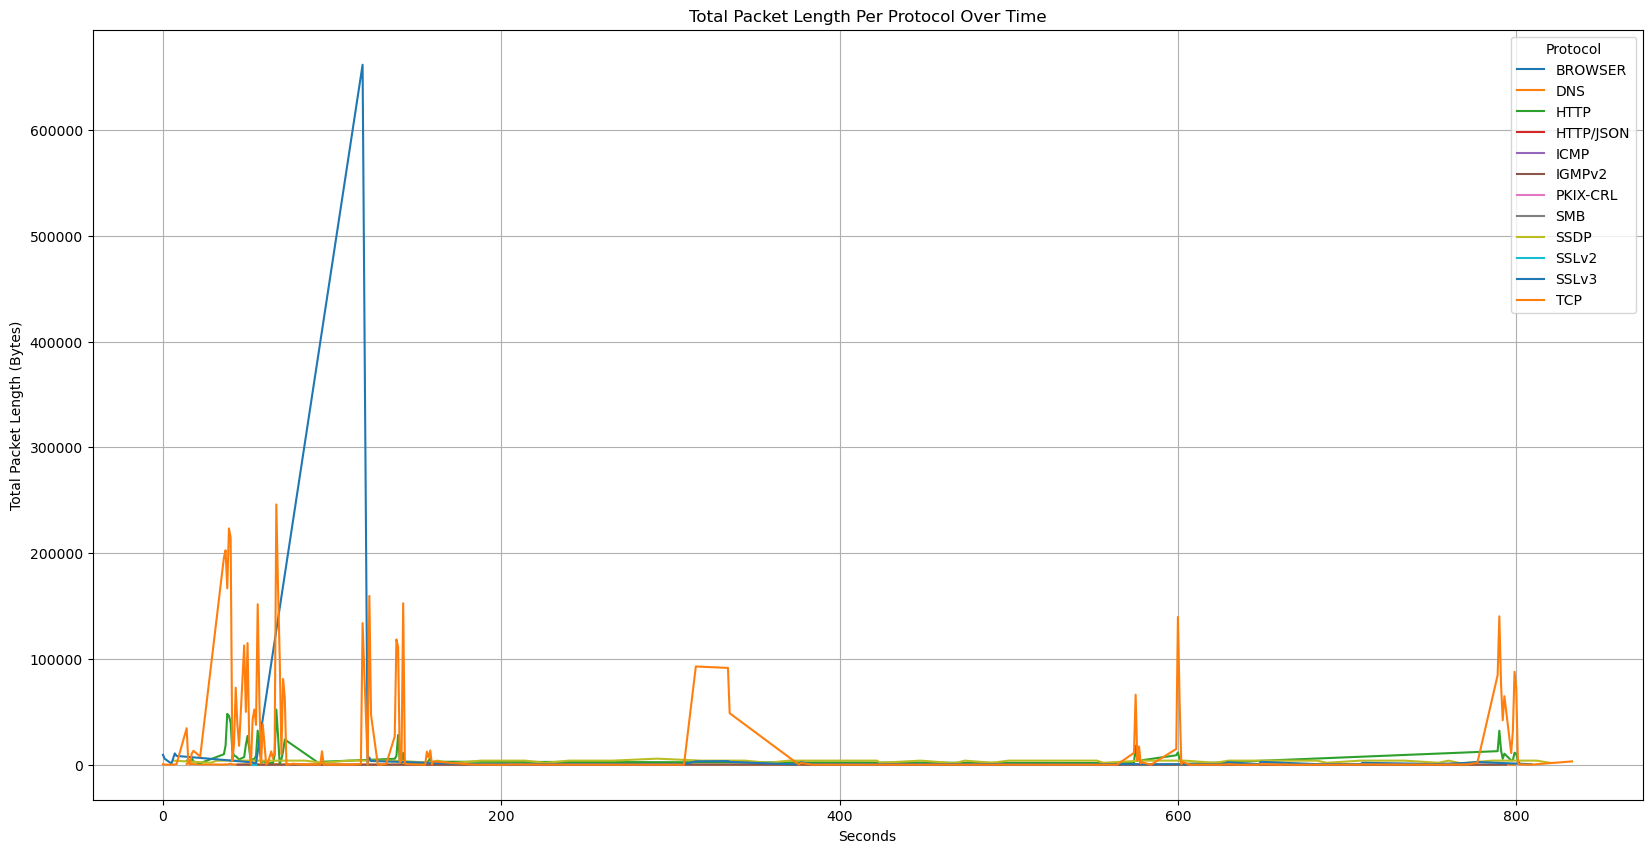

In [ ]:
# convert time to whole seconds 
data['Whole_Seconds'] = data['Time'].astype(int)


#Group by Protocol and Seconds, and calculate the total packets 
grouped_data = data.groupby(['Protocol', 'Whole_Seconds']) ['Length'].sum().reset_index()


#Creting a multi-line Chart 
plt.figure(figsize =(20,10))


# get a list of unique protocols 
protocols = grouped_data['Protocol'].unique()


# plot the data for each unique protocol 
for protocol in protocols:
    #filter data for current protocol 
    protocol_data = grouped_data[grouped_data['Protocol'] == protocol]
    
    #plot the line for this protocol 
    plt.plot(protocol_data['Whole_Seconds'], protocol_data['Length'], label = protocol )
    
    
    
#labels, title ande legend (for colors )
plt.xlabel("Seconds")
plt.ylabel("Total Packet Length (Bytes)")      #
plt.title("Total Packet Length Per Protocol Over Time")
plt.legend(title= "Protocol") 
plt.grid(True)
plt.show()

### Question 7: Describe what you believe are the key findings of each plot, including discussion of any stand-out features. Give justification for your answer in the context of a security scenario. Limit your response to a maximum of 200 words.

#### (6 marks)

### Key Findings 
TThe line chart shows a significant spike in traffic at 120 seconds, where the total packets exceed 800, indicating an anomaly. Smaller spikes at 50 seconds and 800 seconds may suggest periodic bursts of activity, potentially from legitimate system processes or malicious scanning. Prolonged low activity between 300–570 seconds could indicate downtime or periods of low network usage. 

The bar chart highlights TCP as the dominant protocol, accounting for over 6000 packets, with HTTP and SSLv3 contributing moderate traffic. Lesser-used protocols like ICMP and DNS show minimal activity but should be monitored for unexpected spikes, as these could signify protocol exploitation or reconnaissance attempts. 

The scatter plot shows 10.20.0.165 as a key source, communicating with multiple destinations. Additionally, 10.20.0.103 and 10.20.0.254 are also active, each with two destination. Sparse communication patterns may represent normal behavior or indicate targeted activity. 

The node-link diagram reinforces 10.20.0.165 as the central hub, with dense connections suggesting high activity, potentially from a legitimate server or malicious command-and-control traffic. Isolated nodes like 10.20.0.254 and 224.0.0.1 warrant further investigation for unauthorized activity. 

After correlating the diagrams, the central hub, 10.20.0.165, leveraging TCP, likely coordinates malicious activities such as reconnaissance, scanning, and potential data exfiltration through sparse nodes like 10.20.0.254, using unusual protocol activity as part of an organized attack.